<a href="https://colab.research.google.com/github/jelincovil/fund_multitudes_proceso_constituyente_cl/blob/main/Analisis_de_interacciones_Fundacion_Multitudes_(Py).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/jelincovil/fund_multitudes_proceso_constituyente_cl/main/datos%20y%20figuras/Screenshot%202022-11-24%2010.34.57.png" width="200">

<img src="https://raw.githubusercontent.com/jelincovil/logos_images/main/icons8-python.svg" width="100">

<img src="https://raw.githubusercontent.com/jelincovil/logos_images/main/icons8-twitter.svg" width="100">

<img src="https://raw.githubusercontent.com/jelincovil/logos_images/main/icons8-instagram.svg" width="100">

<img src="https://raw.githubusercontent.com/jelincovil/logos_images/main/icons8-facebook.svg " width="100">

# **ANALISIS DE INTERACCIONES DE FACEBOOK, INSTAGRAM Y TWITTER**


**Resumen**


### Instalar y cargar modulos iniciales

In [ ]:
pip install dplython

In [ ]:
pip install plotnine

In [ ]:
import pandas as pd
import numpy as np

from dplython import (DplyFrame, X, diamonds, select, sift,
  sample_n, sample_frac, head, arrange, mutate, group_by,
  summarize, DelayFunction)

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_boxplot, labs, xlab,  ylab, ggtitle, stat_summary, theme, coord_flip, geom_histogram, scale_y_continuous, scale_x_continuous, geom_freqpoly, geom_density, geom_violin, geom_col, position_dodge, geom_text, lims, geom_line

### Lectura de la base de datos


In [ ]:
# timeline rechazo y apruebo
time_apruebo = pd.read_csv('https://raw.githubusercontent.com/jelincovil/data_sets_teaching/main/TT_apruebo_timeline_0604_1506.csv', sep=',')
time_rechazo = pd.read_csv('https://raw.githubusercontent.com/jelincovil/data_sets_teaching/main/TT_rechazo_timeline_0604_1506.csv', sep = ',')
time_constitucion = pd.read_csv('https://raw.githubusercontent.com/jelincovil/data_sets_teaching/main/TT_constitucion_timeline_0604_1506.csv', sep = ',')
# Cambio a tibbles
time_apruebo = DplyFrame(time_apruebo)
time_rechazo = DplyFrame(time_rechazo)
time_constitucion = DplyFrame(time_constitucion)

# Parte I: análisis exploratorio y numérico del impacto (likes) de publicaciones en *Facebook* e *Instagram* 

Verificamos el nombre de las columnas de "time_apruebo" y sus primero cuatro valores.

In [ ]:
# Visualizamos dataframe
time_apruebo.head(5)

,TIMESTAMP,DATE_TIME_UTC,COUNT,RELATIVE_SENTIMENT
0,1649203200,2022-04-06 00:00:00 +00:00,5444,0
1,1649246400,2022-04-06 12:00:00 +00:00,13468,0
2,1649289600,2022-04-07 00:00:00 +00:00,4756,0
3,1649332800,2022-04-07 12:00:00 +00:00,2144,0
4,1649376000,2022-04-08 00:00:00 +00:00,1180,0


In [ ]:
time_apruebo = time_apruebo >> mutate(time = pd.Series(range(1,141)) )

Graficamos los valores evolucionando a lo largo del tiempo.

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


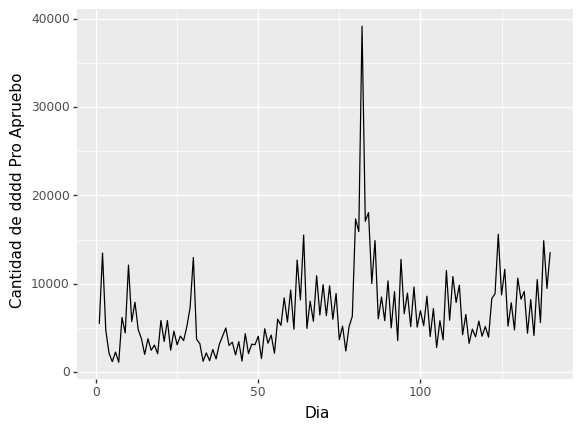

<ggplot: (8765129384525)>

In [ ]:
(
    ggplot(time_apruebo, aes(x='time', y='COUNT'))
    + geom_line() # line plot
    + labs(x='Dia', y=' Cantidad de dddd Pro Apruebo')
) 

In [ ]:
time_rechazo = time_rechazo >> mutate(time = pd.Series(range(1,141)) )

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


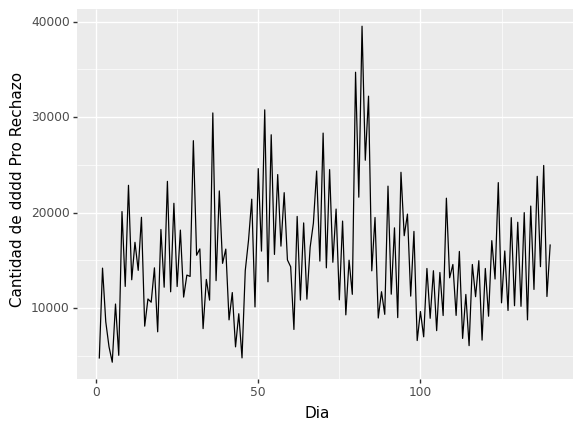

<ggplot: (8765129346361)>

In [ ]:
(
    ggplot(time_rechazo, aes(x='time', y='COUNT'))
    + geom_line() # line plot
    + labs(x='Dia', y=' Cantidad de dddd Pro Rechazo')
) 

In [ ]:
time_constitucion = time_constitucion >> mutate(time = pd.Series(range(1,141)) )

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


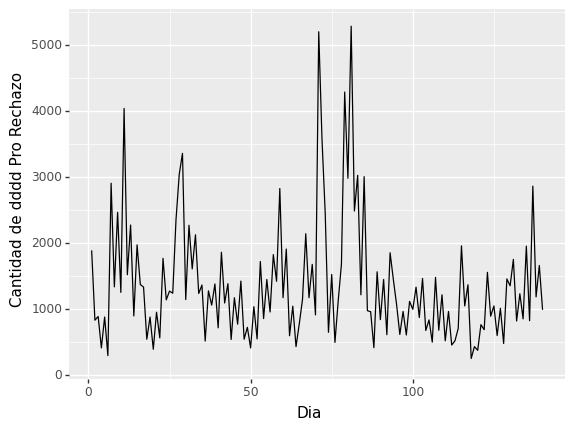

<ggplot: (8765142552341)>

In [ ]:
(
    ggplot(time_constitucion, aes(x='time', y='COUNT'))
    + geom_line() # line plot
    + labs(x='Dia', y=' Cantidad de dddd Pro Rechazo')
) 

### Determinación de fechas de interacción máxima

El objetivo de esta sección es determinar el (los) día (s) en donde más tuvo impacto el hashtag \#Apruebo.


In [ ]:
pip install pyextremes

/usr/local/lib/python3.7/dist-packages/pyextremes/eva.py:84: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version.  check index.inferred_type instead


(<Figure size 768x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ca5f30390>)

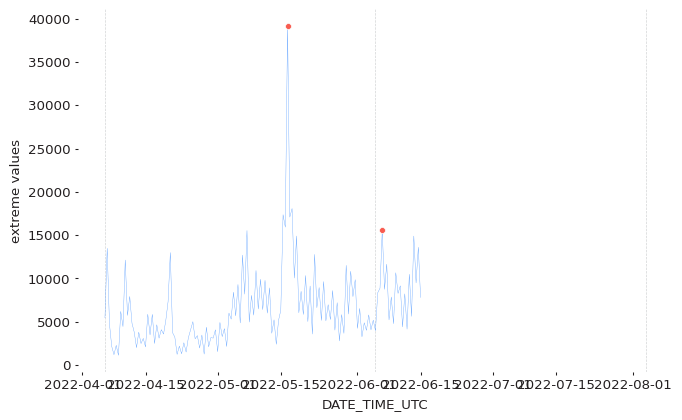

In [ ]:
from pyextremes import EVA
time_apruebo = pd.read_csv('https://raw.githubusercontent.com/jelincovil/data_sets_teaching/main/TT_apruebo_timeline_0604_1506.csv', sep=',')
date = pd.DatetimeIndex(time_apruebo['DATE_TIME_UTC']) 
time_apruebo = pd.Series(time_apruebo['COUNT'].ravel(), index = date )
time_apruebo.shape

model0 = EVA(time_apruebo)
model0.get_extremes(method = 'BM', block_size = "60D")
model0.plot_extremes()

In [ ]:
# Fechas claves
model0.extremes

DATE_TIME_UTC
2022-05-16 12:00:00+00:00    39176.0
2022-06-06 12:00:00+00:00    15604.0
Name: extreme values, dtype: float64

Las fechas en donde el Apruebo tuvo un *peak* de impacto fueron:
- 2022-05-16 12:00:00+00:00    39176.0 (Alto)
- 2022-06-06 12:00:00+00:00    15604.0 (medio)

El dia 16 de Mayo del 2022 (2022-05-16) fue la presentacion del proyecto de nueva constitucion en el congreso nacional. Este fue el dia de mayor numero de impacto del hashtag \#Apruebo.


El dia 06 de junio del 2022 (2022-06-06) Apruebo Dignidad y Socialismo Democrático acuerdan coordinación conjunta de cara al plebiscito de salida Dirigentes de ambas coaliciones destacaron la importancia de abordar en conjunto la campaña por el Apruebo incluyendo a otras colectividades como la Democracia Cristiana.





## Parte 2. Analisis de interacciones de constituyentes en *Twitter* 

In [ ]:
# timeline rechazo y apruebo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# modulo de networks
import networkx as nx
url1 = 'https://raw.githubusercontent.com/jelincovil/fund_multitudes_proceso_constituyente_cl/main/datos%20y%20figuras/TT_apruebo_gephi_0604_1506.csv'
url2 = 'https://raw.githubusercontent.com/jelincovil/fund_multitudes_proceso_constituyente_cl/main/datos%20y%20figuras/TT_constitucion_gephi_0604_1506.csv'
url3 = 'https://raw.githubusercontent.com/jelincovil/fund_multitudes_proceso_constituyente_cl/main/datos%20y%20figuras/TT_rechazo_gephi_0604_1506.csv'
net1 = pd.read_csv(url1, sep=',')
net2 = pd.read_csv(url2, sep = ',')
net2 = pd.read_csv(url3, sep = ',')


### II A. Interacciones del hashtag \#Apruebo

Debido a que existe una inmensa cantidad de interacciones espureas, descartamos interacciones con un peso menor a $10$ en los $3$ casos.  

$$
\text{Weight} >10.
$$

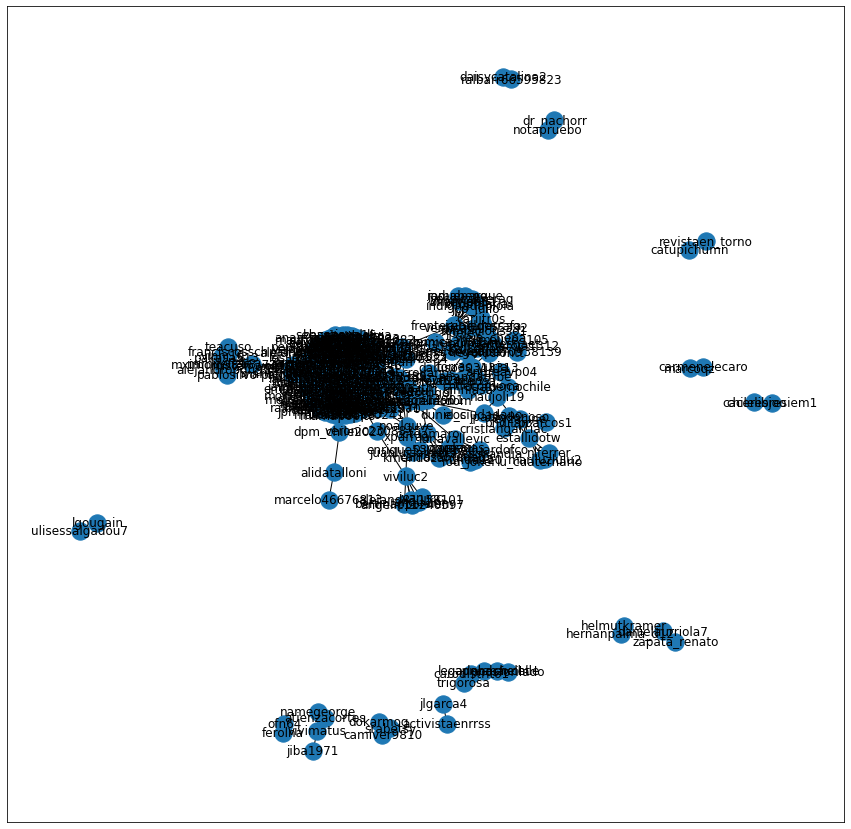

In [ ]:
G1 = nx.from_pandas_edgelist( net1[net1['WEIGHT']>10],
                             source = 'FROM',
                             target = 'TO',
                             edge_attr = 'WEIGHT' )

plt.figure(3,figsize=(15,15)) 
nx.draw_networkx(G1, pos=nx.spring_layout(G1))
plt.show()

Graficamente, se puede distiguir una forma aproximada de una red del tipo **esparso**.

En ciencia de redes, una red esparsa tiene muchos menos enlaces que el número máximo posible de enlaces dentro de esa red (lo contrario es una red densa). El estudio de redes dispersas es un área relativamente nueva estimulada principalmente por el estudio de redes reales, como redes sociales e informáticas.

La noción intuitiva de este tipo de red se puede inventar un umbral para una red en particular, no existe un umbral universal que defina lo que realmente significa una red. Como resultado, no existe un sentido formal de escasez para ninguna red finita, a pesar del acuerdo generalizado de que la mayoría de las redes empíricas son, de hecho, escasas. **Es decir, existen una gran cantidad de redes autónomas o independientes entre sí y una baja conectividad en la red completa**.

Para mas informacion ver [Sparce network Wiki](https://en.wikipedia.org/wiki/Sparse_network).




In [ ]:
print(nx.info(G1))
#print('# of edges: {}'.format(G12.number_of_edges()))
#print('# of nodes: {}'.format(G12.number_of_nodes()))

Graph with 249 nodes and 275 edges


In [ ]:
from networkx.algorithms.connectivity.edge_kcomponents import bridge_components
sorted(map(sorted, bridge_components(G1)))

[['1970sith',
  'ab_eddo',
  'bosqueazul1',
  'helenagallardom',
  'hugoguionista',
  'lromer2016',
  'naldo1970',
  'octoamaro',
  'rosarioacemon'],
 ['academica2021', 'frenterebeldes', 'marcegeopch'],
 ['activistaenrrss'],
 ['alecelish'],
 ['alejand72427813'],
 ['alexornis5'],
 ['alidatalloni'],
 ['anamari50348479'],
 ['anandatribe'],
 ['angelic11240397'],
 ['anonymuschileno'],
 ['apruebaxchile'],
 ['basaesvaldivia'],
 ['bluck_bony'],
 ['brnalillo'],
 ['caceresjoo'],
 ['camiver9810'],
 ['carlosramones14'],
 ['caroamadrid'],
 ['carrasco_cueto'],
 ['cata42335233'],
 ['chilelibresiem1'],
 ['chuncho_de_'],
 ['cidpatita'],
 ['clara36138202'],
 ['copihua85'],
 ['cristiangalett3'],
 ['cristiangarciac'],
 ['crovanos'],
 ['cyndi_gon'],
 ['daluso303133'],
 ['daluso30313313', 'palkatiao', 'roja53c', 'torres_yuria'],
 ['danielaurriola7'],
 ['dinamo2580'],
 ['dokarmog'],
 ['dpm_chile2020'],
 ['dr_nachorr'],
 ['edumartinezcam'],
 ['eduringraja'],
 ['el_ciudadano'],
 ['enrique53904974'],
 ['estalli

Destacamos el cluster con mayor interaccion

```

['@1970sith', '@ab_eddo', '@bosqueazul1', '@helenagallardom','@hugoguionista', '@lromer2016', '@naldo1970', '@octoamaro',
'@rosarioacemon']


```
Las cuentas de usuarios mas conectados:

- [@1970sith](https://twitter.com/1970Sith) .
- [@ab_eddo](https://twitter.com/ab_eddo)
- [@bosqueazul1](https://twitter.com/BosqueAzul1)
- [@helenagallardom](https://twitter.com/hugoalonso1980)
- [@hugoguionista](https://twitter.com/hugoguionista)
- [@lromer2016](https://twitter.com/lromer2016)
- [@naldo1970](https://twitter.com/Naldo1970)
- [@octoamaro](https://twitter.com/octoamaro)
- [@rosarioacemon](https://twitter.com/rosarioacemon)




### Analisis de nodos y centralidad


In [ ]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)

In [ ]:
from networkx import bipartite
from networkx.algorithms import bipartite
people = set()
GG1 = bipartite.projected_graph(G1, ['helenagallardom', 'hugoguionista'])

betweenness = nx.betweenness_centrality(GG1, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:4]

[('helenagallardom', 13571.5),
 ('hugoguionista', 2696.5),
 ('bosqueazul1', 367.71428571428567),
 ('lettyblur', 367.71428571428567)]

Las cuentas '\@bosqueazul1' y'\@hugoguionista' son las **mas conectadas con caminos cortos** en toda la red.

In [ ]:
eigenvector = nx.eigenvector_centrality(GG1)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:4]

[('helenagallardom', 0.7060127206659099),
 ('bosqueazul1', 0.06098687120057063),
 ('lettyblur', 0.06098687120057063),
 ('ab_eddo', 0.06098687120057063)]

La centralidad del **eigenvector**  mide la importancia de un nodo al tiempo que considera la importancia de sus vecinos. La cuenta de mayor inportancia es '@helenagallardom'.

In [ ]:
closeness = nx.closeness_centrality(GG1)
sorted(closeness.items(), key=lambda x:x[1], reverse=True)[0:4]

[('helenagallardom', 0.8267326732673267),
 ('bosqueazul1', 0.5030120481927711),
 ('lettyblur', 0.5030120481927711),
 ('ab_eddo', 0.5030120481927711)]

La centralidad del **eigenvector**  mide la importancia de un nodo al tiempo que considera la importancia de sus vecinos. La cuenta de mayor inportancia es '@helenagallardom', '@bosqueazul1' y '@lettyblur'.

# Conclusiones

1.- El día de mayor impacto del hashtag \#Apruebo fue el día de la presentación del proyecto de nueva constitución. Este impacto es un valor extremo distanciado significativamente de los otros eventos.
2.- Las interacciones de Twitter forman una red del tipo esparsa. Muchos grupos autónomos de interacción.  
3.- Los cuentas mas conectadas y con mayor inpacto dentro de las red son: '@helenagallardom', '@bosqueazul1', '@lettyblur', '@ab_eddo.

# Referencias
- [Github Nwetworkx](https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide).
- Platt, E. L. (2019). Network Science with Python and NetworkX Quick Start Guide: Explore and Visualize Network Data Effectively. Packt Publishing Ltd.
- Hagberg, A., \& Conway, D. (2020). NetworkX: Network Analysis with Python. URL: https://networkx. github. io.
- Pyextremes Packages.  https://georgebv.github.io/pyextremes/